# Lab1
Welcome to the Turtlebot4 Orientation Lab. Here you will learn to:
* Read data from the robots services
* Drive the robot around
* Accuracy of the odometry

Next, just execute the code cells below in sequence, read the comments, the output, and see what happens.

Don't worry, you can modify this code as you like. First, let's confirm you know how to run the code.

In [16]:
# This text box is called a cell.
# In this environment, a Jupyter Python Notebook, it contains Python code.
# Click on the triangle left of this box (cell) to execute it.
# The output will appear below.
print(1+1)

2


# Load Robot wrapper and initialize ROS
While the Turtlebot4 works using ROS2, you are using a wrapper around
ROS2 to make things more straight forward. 

You can inspect the wrapper by opening the file [/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py](/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py)

In [2]:
import turtlebot4_wrapper

turtlebot4_wrapper.use_hardware()
# turtlebot4_wrapper.use_simulation()

# load ROS library
import rclpy
if not rclpy.ok():
    rclpy.init()

# Instantiate Wrapper. The subscribes and publishes the relevant topics and connects the actions.
if not "robot" in globals():
    robot = turtlebot4_wrapper.Robot()

You are connected to uwbot-15
Robot is reachable


Could not determine the type for the passed topic


ros2 topic echo --once /ip failed. Proceed with caution.
ros2 topic subscription working. Everything is working as expected.


# Example: Read data from topics: Battery charge state
Check Battery State. Note: 10% get you 10 minutes of runtime.


In [3]:
# Make sure we have fresh data by waiting for a new message
robot.battery_state_future = rclpy.Future()
robot.spin_until_future_completed(robot.battery_state_future)

# Pretty print the contents of the message
print("Battery {0:2.3}%, charging with {1:2.2}A".format(
    robot.last_battery_state_msg.percentage*100,
    robot.last_battery_state_msg.current
))

Battery 1e+02%, charging with -0.6A


# Example: Drive the robot via teleoperation
First, undock the robot using a preprogrammed behavior. Then open the visualization to drive the robot using buttons. After you are done, dock the robot again.

In [4]:
robot.undock()

KeyboardInterrupt: 

In [5]:
robot.open_visualization()

ValueError: Unknown format code 'd' for object of type 'str'

In [20]:
print("You can additional move the robot with your phone:")
robot.open_visualization(open_url=False,mobile_layout=True,display_qrcode=True)

You can additional move the robot with your phone:


ValueError: Unknown format code 'd' for object of type 'str'

On the new webpage In the foxglove visualizer, you can drive the robot with panels in the bottom right hand corner. After you are done exploring, position the robot so that it is approximately 1-2m away from the dock and is pointing towards the dock.

In [4]:
robot.dock()

irobot_create_msgs.action.Dock_Result(is_docked=True)

# Example: Drive a square shape
In this example the robot automatically drives a square shape. While this is interesting to watch, it shows also some challenges. Before you execute this, mark the start position on the floor using tape as shown below (TODO: picture. Place your start position such that the robot has at least 0.5m space to the front and 0.5m to the left. Then execute the next cell. The code will also start a background logging process so you can analyze the data later.

In [7]:
# send_cmd_vel (forward_velocity, rotation_velocity, duration)
robot.reset_odometry() # make the robot think it is at position (0,0,0) 
robot.configure_logging(["/odom","/tf","/tf_static","/scan"]) # set topics which should be recorded
robot.start_logging() # start the background logging process
for iterations in range(2): # drive the square
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
logging_dir = robot.stop_logging()
log_data = robot.get_logging_data(logging_dir) # parse the logged data and import in python

Executing the next cell will open the log data in the visualizer.

In [21]:
robot.open_logging_data_in_visualizer(logging_dir)
robot.delete_logging_data(logging_dir)

NameError: name 'logging_dir' is not defined

In [22]:
# Plot data in the notebook
print("Collected {} samples".format(len(log_data['/odom'])))
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
# TODO: decide if x forward is really the way to go
plt.xlim([-1.5,0.2])
plt.ylim([-0.2,1.5])
for msg in log_data['/odom'][::20]:
    T3D = robot.convert_odom_to_transform(msg[1].pose.pose)
    T2D = robot.reduce_transform_to_2D(T3D)
    circ = Circle((-T2D[1,2],T2D[0,2]),0.1) # TODO: correct radius
    circ.set_fill(False)
    ax.add_patch(circ)
    angle = robot.rotation_from_transform(T2D)
    import math
    angle = angle/math.pi*180
    wedge = Wedge((-T2D[1,2],T2D[0,2]),0.1, angle+180+45, angle+360-45)
    ax.add_patch(wedge)

NameError: name 'log_data' is not defined

From the experiment, please try to explain two aspect:
* Discrepancies between the commanded robot motion and the executed one
* Discrepancies between the measured motion and the one you observed
Try to come up with an answer and write it in the next field

# Use this field

Later, after you are done with this lab please save this notebook. Then commit the repository and push it. Detailled instructions will follow, but this is how you submit your work in this course.

# Example: Drive robot and aquire odometry
Tape measure, tape. Optional: Laser pointer.

* Tape two parallel lines `0.2m` apart on the floor. These are start and finish lines `0.2m`.
* Place the robot at the start line
* Read data from the Odometry topic
* Command the robot to drive `0.2m` straight
* Read data from the Odometry topic.
Did the robot travel `0.2m`? Where could the error come from?

Modify the experiment to investigate the behavior for rotation. Instead of the start and finish line attach a laser pointer to the base and aim it at a reference point. Command the robot to turn one full revolution.

Reading:
- Odometry sensor: TODO: find link
- Quaternions: https://en.wikipedia.org/wiki/Quaternion#Quaternions_and_the_space_geometry


In [ ]:
# Use preprogrammed behavior: Drive off the dock in a controlled way
robot.undock()

In [6]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose1 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose1.position)
print(pose1.orientation)

geometry_msgs.msg.Point(x=0.4584760367870331, y=0.5498003363609314, z=0.001171798910945654)
geometry_msgs.msg.Quaternion(x=0.008352190256118774, y=-0.004326898138970137, z=0.026873841881752014, w=0.999594509601593)


In [12]:
# Drive with desired velocity command:
velocity_x = 0 # in m/s
velocity_phi = 0.5 # for rotation test use 0.5 rad/s
duration = 12.56 # in s
robot.set_cmd_vel(velocity_x, velocity_phi, duration)

In [8]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose2 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose2.position)
print(pose2.orientation)

geometry_msgs.msg.Point(x=0.6716914176940918, y=0.5613653659820557, z=0.0012475784169510007)
geometry_msgs.msg.Quaternion(x=0.0033513254020363092, y=0.0055266013368964195, z=0.026022017002105713, w=0.9996404647827148)


In [13]:
# translation
print("Desired distance: {}".format(velocity_x*duration))
import numpy
print("Measured distance: {}".format(
    numpy.sqrt( (pose1.position.x - pose2.position.x)**2 + (pose1.position.y - pose2.position.y)**2 ) ))

# rotation
import eigenpy # makes use of the Eigen C++ library ()
def make_quaternion(q):
    return eigenpy.Quaternion(q.w,q.x,q.y,q.z)
print("Desired rotation: {}".format(
    velocity_phi * duration))
print("Measured rotation: {}".format(
    make_quaternion(pose1.orientation).angularDistance(make_quaternion(pose2.orientation))))


Desired distance: 0.0
Measured distance: 0.21352880031855098
Desired rotation: 6.28
Measured rotation: 0.02216565680041899


In [11]:
'''
Test 1:
Desired distance: 0.2
Measured distance: 0.21352880031855098

There was a slight recorded error of around +0.0135 m, though this is impercebtible to a human observer on this scale, despite being around 1cm.
This is because the robot bases this movement without referencing its surroundings, and essentially has to make a guess on how many wheel rotations 0.2m is.
Because of the smooth office floor and other random error, there will be a continuous drift between where the robot believes it is and where it actually is.


Test 2: Why use 0.5 rad?
Desired rotation: 6.28
Measured rotation: 0.02216565680041899

Assuming the measured rotation references how far it spun from the 0 point, the robot measured an error of an extra ~0.02 rad over a full turn.
This is partially because of the truncation error introduced by working with radians, and how I defined the movement (probably should have used pi, instead of saying 12s.)
But it is also as a result of the same factors discussed above, with an inherent error being present in how the odometry is measured.

'''

'\nTest 1:\nDesired distance: 0.2\nMeasured distance: 0.21352880031855098\nDesired rotation: 0.0\nMeasured rotation: 0.02216565680041899\n\n'

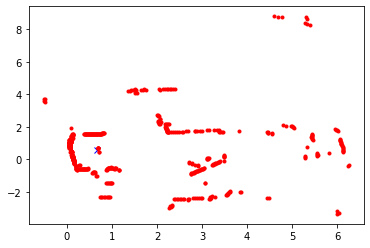

In [10]:
from matplotlib import pyplot as plt
import numpy as np

robot.reset_odometry() # make the robot think it is at position (0,0,0)

# Plot robot position from odometry
# Use blue cross marker to designate the robot position
pose = robot.last_odom_msg.pose.pose
plt.plot([pose.position.x],[pose.position.y],'bx') # TODO: show robot front

# not sure why but this sometimes hangs here so I pulled out the static transform manually into T_base_lidar
# T_base_lidar = robot.get_tf_transform("rplidar_link","base")
# T_base_lidar = robot.reduce_transform_to_2D(T_base_lidar)

T_base_lidar = np.array([[ 2.22044605e-16, -1.00000000e+00, -4.00000000e-02],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

# Plot lidar points from last message
def plot_lidar_scan_points(msg,pose):
    # Convert received lidar points into cartesian coordinates considering the current position from odometry
    import numpy
    points = [(numpy.cos(angle)*radius,numpy.sin(angle)*radius) for angle, radius \
              in zip(numpy.linspace(msg.angle_min,msg.angle_max,len(msg.ranges)),msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))
    
    # remove points which cannot be measured
    filtered_points = filter(lambda x: numpy.isfinite(x).all(),points)
    
    # display points in world frame
    transformed_points = [numpy.matmul(np.dot(T,T_base_lidar),
        numpy.vstack([ numpy.atleast_2d(x).T,numpy.ones((1,1)) ]) ) for x in 
                          filtered_points]
    plt.plot(
        [x[0] for x in transformed_points],
        [x[1] for x in transformed_points],'r.')

plot_lidar_scan_points(robot.last_scan_msg,pose)